In [1]:
!pip install spacy
!pip install textract
!pip install wordcloud
from wordcloud import WordCloud

import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
os.listdir('C:\\Users\\NAVEEN\\Downloads\\Resume Docx\\Resumes') 


['Peoplesoft resumes',
 'Reactjs Developer',
 'SQL Developer Lightning insight',
 'workday resumes']

In [3]:
file_path1 = []
category1  = []
directory1 = 'C:\\Users\\NAVEEN\\Downloads\\Resume Docx\\Resumes\\PeopleSoft resumes/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft resumes') 

In [4]:
df1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
df1['Category1'] = category1
df1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft resumes
1,Classification: Internal\n\nClassification: In...,PeopleSoft resumes
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft resumes
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft resumes
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft resumes
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft resumes
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resumes
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resumes
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft resumes
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft resumes


In [5]:
file_path2 = []
category2  = []
directory2 = 'C:\\Users\\NAVEEN\\Downloads\\Resume Docx\\Resumes\\Reactjs Developer/'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('Reactjs Developer') 

In [6]:
df2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
df2['Category2'] = category2
df2

,Raw_Details,Category2
0,Name: Ravali P \n\n\n\n ...,Reactjs Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,Reactjs Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,Reactjs Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,Reactjs Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,Reactjs Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,Reactjs Developer
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,Reactjs Developer
7,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",Reactjs Developer
8,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,Reactjs Developer
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,Reactjs Developer


In [7]:
file_path3 = []
category3 = []
directory3 = 'C:\\Users\\NAVEEN\\Downloads\\Resume Docx\\Resumes\\SQL Developer Lightning insight/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer Lightning insight') 

In [8]:
df3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
df3['Category3'] = category3
df3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning insight
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning insight
2,BUDDHA VAMSI ...,SQL Developer Lightning insight
3,KAMBALLA PRADEEP ...,SQL Developer Lightning insight
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer Lightning insight
5,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning insight
6,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer Lightning insight
7,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning insight
8,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer Lightning insight
9,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer Lightning insight


In [9]:
file_path4 = []
category4 = []
directory4 = 'C:\\Users\\NAVEEN\\Downloads\\Resume Docx\\Resumes\\workday resumes/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('workday resumes') 

In [10]:
df4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
df4['Category4'] = category4
df4

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday resumes
1,Name : Gopi Krishna Reddy\n\n\t\t ...,workday resumes
2,G Himaja\n\n ...,workday resumes
3,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday resumes
4,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday resumes
5,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,workday resumes
6,Workday HCM Techno functional Consultant ...,workday resumes
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,workday resumes
8,Srikanth (WORKDAY hCM Consultant)\t ...,workday resumes
9,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday resumes


In [11]:
resume_data = df1.append([df2, df3, df4], ignore_index = True)
resume_data


,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft resumes,NaN,NaN,NaN
1,Classification: Internal\n\nClassification: In...,PeopleSoft resumes,NaN,NaN,NaN
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft resumes,NaN,NaN,NaN
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft resumes,NaN,NaN,NaN
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft resumes,NaN,NaN,NaN
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft resumes,NaN,NaN,NaN
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resumes,NaN,NaN,NaN
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resumes,NaN,NaN,NaN
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft resumes,NaN,NaN,NaN
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft resumes,NaN,NaN,NaN


In [12]:
resume_data['Category'] = category1+category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft resumes,NaN,NaN,NaN,PeopleSoft resumes
1,Classification: Internal\n\nClassification: In...,PeopleSoft resumes,NaN,NaN,NaN,PeopleSoft resumes
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft resumes,NaN,NaN,NaN,PeopleSoft resumes
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft resumes,NaN,NaN,NaN,PeopleSoft resumes
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft resumes,NaN,NaN,NaN,PeopleSoft resumes
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft resumes,NaN,NaN,NaN,PeopleSoft resumes
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resumes,NaN,NaN,NaN,PeopleSoft resumes
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resumes,NaN,NaN,NaN,PeopleSoft resumes
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft resumes,NaN,NaN,NaN,PeopleSoft resumes
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft resumes,NaN,NaN,NaN,PeopleSoft resumes


In [13]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis=1, inplace=True)
resume_data

,Raw_Details,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft resumes
1,Classification: Internal\n\nClassification: In...,PeopleSoft resumes
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft resumes
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft resumes
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft resumes
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft resumes
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resumes
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resumes
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft resumes
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft resumes


In [14]:
resume_data.isnull().sum()

Raw_Details    0
Category       0
dtype: int64

In [15]:
resume_data.to_csv('Raw_Resume.csv', index=False)

In [16]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Raw_Details,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft resumes
1,Classification: Internal\n\nClassification: In...,PeopleSoft resumes
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft resumes
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft resumes
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft resumes
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft resumes
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resumes
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resumes
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft resumes
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft resumes


In [17]:
resume_data.isnull().sum()

Raw_Details    0
Category       0
dtype: int64

In [18]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [19]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['cleanResume'] = resume_data.Raw_Details.apply(lambda x: cleanResume(x))

In [20]:
resume_data

,Raw_Details,Category,cleanResume
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft resumes,Anubhav Kumar Singh Core Competencies Scriptin...
1,Classification: Internal\n\nClassification: In...,PeopleSoft resumes,Classification Internal Classification Interna...
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft resumes,SIRAZUDDIN M Bangalore INDIA SIRAZUDDIN M Bang...
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft resumes,PeopleSoft Admin VARKALA VIKAS Career Objectiv...
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft resumes,PeopleSoft Administration Vivekanand Sayana Ca...
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft resumes,Hari Narayana PROFESSIONAL SUMMARY Having 4 6 ...
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resumes,Murali PROFESSIONAL SUMMARY Having 4 6 years o...
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resumes,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft resumes,Tanna Sujatha OBJECTIVE Seeking a challenging ...
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft resumes,C O N T A C T Address Manyata Tech Park Nagava...


In [21]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,cleanResume
0,PeopleSoft resumes,Anubhav Kumar Singh Core Competencies Scriptin...
1,PeopleSoft resumes,Classification Internal Classification Interna...
2,PeopleSoft resumes,SIRAZUDDIN M Bangalore INDIA SIRAZUDDIN M Bang...
3,PeopleSoft resumes,PeopleSoft Admin VARKALA VIKAS Career Objectiv...
4,PeopleSoft resumes,PeopleSoft Administration Vivekanand Sayana Ca...
5,PeopleSoft resumes,Hari Narayana PROFESSIONAL SUMMARY Having 4 6 ...
6,PeopleSoft resumes,Murali PROFESSIONAL SUMMARY Having 4 6 years o...
7,PeopleSoft resumes,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...
8,PeopleSoft resumes,Tanna Sujatha OBJECTIVE Seeking a challenging ...
9,PeopleSoft resumes,C O N T A C T Address Manyata Tech Park Nagava...


In [22]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [23]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,cleanResume
0,PeopleSoft resumes,Anubhav Kumar Singh Core Competencies Scriptin...
1,PeopleSoft resumes,Classification Internal Classification Interna...
2,PeopleSoft resumes,SIRAZUDDIN M Bangalore INDIA SIRAZUDDIN M Bang...
3,PeopleSoft resumes,PeopleSoft Admin VARKALA VIKAS Career Objectiv...
4,PeopleSoft resumes,PeopleSoft Administration Vivekanand Sayana Ca...
5,PeopleSoft resumes,Hari Narayana PROFESSIONAL SUMMARY Having 4 6 ...
6,PeopleSoft resumes,Murali PROFESSIONAL SUMMARY Having 4 6 years o...
7,PeopleSoft resumes,Priyabrata Hota CAREER OBJECTIVE Pursuing Peop...
8,PeopleSoft resumes,Tanna Sujatha OBJECTIVE Seeking a challenging ...
9,PeopleSoft resumes,C O N T A C T Address Manyata Tech Park Nagava...


In [24]:
resume_data.cleanResume[5]

'Hari Narayana PROFESSIONAL SUMMARY Having 4 6 years of experience in PeopleSoft application enhancement implementation Data conversion Support and Upgrade projects Well experienced on People tools and having Functional knowledge HCM and FSCM Applications Skill People Tools Application Designer Application Engine People Code Application Packages PeopleSoft Application FSCM and HCM Applications FSCM Modules Procurement PO AP AR Billing and GL HCM Modules Recruiting Performance Management WAF Benefits Interfaces Component Interface and File Layout Other Languages C C Database Oracle SQL Server DB2 Operating System Windows UNIX EDUCATION Bachelor of Technology B Tech from JNTU K Currently Working as a People Soft Consultant in Randstad Hyderabad RELEVANT EXPERIENCE PeopleSoft Consultant Randstad Hyderabad Andhra Pradesh India June 2020 to till date Project Randstad Enhancements Client Randstad Staffing Responsibilities Analyze the requirement documents to understand the customer business 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('using', 247), ('SQL', 202), ('Workday', 188), ('Experience', 173), ('PeopleSoft', 162), ('Application', 139), ('experience', 134), ('Project', 131), ('Server', 126), ('data', 125), ('React', 123), ('business', 113), ('2', 106), ('8', 103), ('various', 95), ('like', 94), ('knowledge', 94), ('reports', 94), ('HCM', 92), ('Web', 87), ('Involved', 85), ('Good', 79), ('I', 75), ('Reports', 75), ('Developer', 75), ('system', 74), ('Worked', 71), ('EIB', 71), ('1', 70), ('People', 68), ('9', 68), ('process', 68), ('application', 67), ('working', 65), ('creating', 65), ('Responsibilities', 64), ('Role', 62), ('Tools', 62), ('Created', 61), ('JS', 61), ('Oracle', 59), ('support', 59), ('new', 59), ('Windows', 58), ('issues', 56), ('Client', 56), ('Core', 55), ('Process', 55), ('3', 55), ('integrations', 55)]


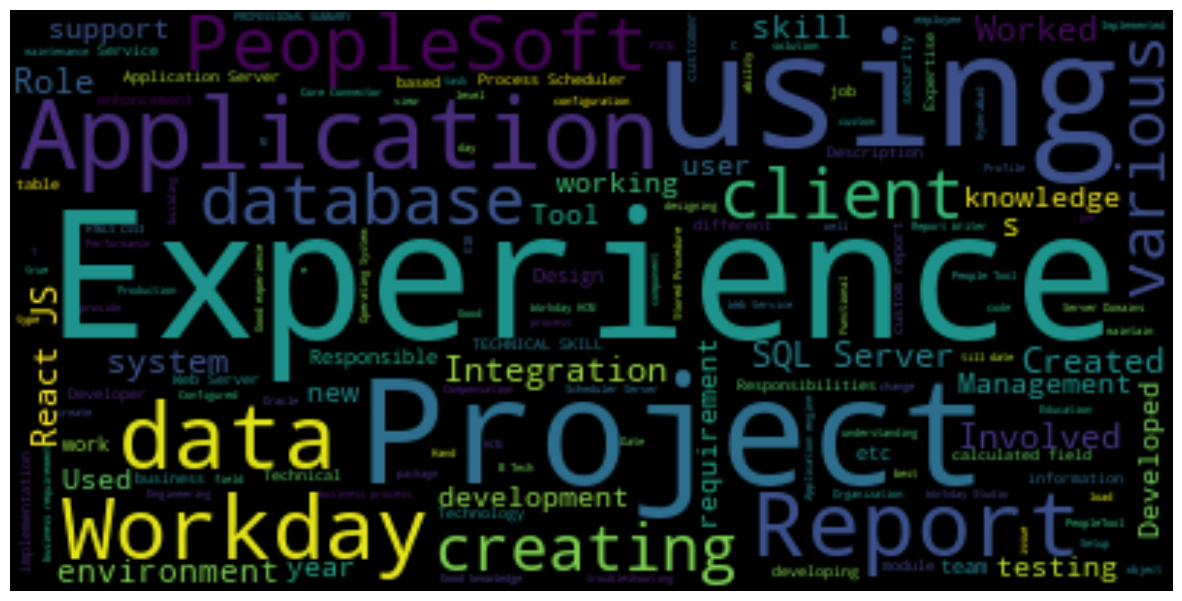

In [32]:
nltk.download('stopwords')
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['cleanResume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()